In [1]:
import sympy
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

import solvers
import curve_constraint

In [2]:
sympy.var("x y", real=True)

# shape = sympy.solve(x**2 + y**2 - 1, y)
circle = curve_constraint.CurveConstraint(x**2 + y**2 - 1, x, y)

In [3]:
# ensure consistent starting values
q0, v0 = circle.start_projection((1, 1), -1)
print(q0, v0)

mass = 1
M = np.array([[mass, 0, 0],
              [0, mass, 0],
              [0, 0, 0]])
friction = 0.01
C = np.array([[friction, 0, 0],
              [0, friction, 0],
              [0, 0, 0]])

# see https://jschoeberl.github.io/IntroSC/ODEs/mechanical.html#systems-with-constraints
# force = lambda q: np.concatenate([np.array([0, -0.5]) + np.array([2*q[0]*q[2], 2*q[1]*q[2]]), np.array([q[0]**2 + q[1]**2 - 1])]) # gravity + lambda*constraint_force
force = circle.force_to_constraint_force(lambda q: np.array([0, -0.5]))

[0.70710679 0.70710677 0.        ] [ 0.70710678 -0.70710678  0.        ]


In [4]:
status = widgets.HTML("-")
display(status)

HTML(value='-')

In [5]:
def callback(step, new):
    status.value = F"step = {step}, new = {new}"
    
    if (step % 3) == 0:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        ax.set(xlim=[-1.5,1.5], ylim=[-1.5,1.5])
        circle.plot(ax)
        point = ax.plot(new[0], new[1], "bo", animated=True)[0]
        plt.show()
        time.sleep(0.005)

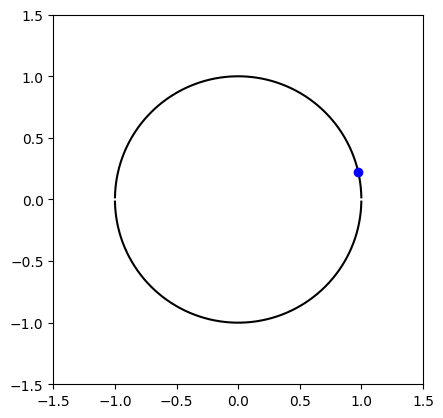

array([ 0.97662263,  0.21498841, -0.60860221,  0.24745268, -1.1240508 ,
       -0.82977635, -1.18994715, -0.75113723, -0.5538657 ])

In [6]:
# if generalized alpha does not work any more, vary rhoinfty
#     or try alpha-RATTLE: https://onlinelibrary.wiley.com/doi/pdf/10.1002/zamm.200610285 equations 17
solvers.generalized_alpha(q0, v0, M, C, force, 1000, 6, callback=callback)